# Diffusion Model in Pytorch to generate cosmological maps

Denoising Diffusion Probabilistic Model (DDPM) in Pytorch to generate astrophysical maps, trained with CAMELS simulations. 

Using DDPM Pytorch implementation from [Denoising Diffusion Pytorch](https://github.com/lucidrains/denoising-diffusion-pytorch). See also the annotated code by Niels Rogge, Kashif Rasul in Hugging Face, [The Annotated Diffusion Model](https://huggingface.co/blog/annotated-diffusion)

Download images from the [CAMELS Multifield dataset](https://camels-multifield-dataset.readthedocs.io/en/latest/access.html).

In this example we make use of 15k maps of the total mass field at $z=0$ from the LH SIMBA dataset: `Maps_Mtot_SIMBA_LH_z=0.00.npy`

In [1]:
import torch
from utils import sample_plot_image
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model = Unet(
    dim = 128,
    dim_mults = (1, 2, 4, 8),
    channels = 1
)

diffusion = GaussianDiffusion(
    model,
    image_size = 256,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
)

In [2]:
trainer = Trainer(
    diffusion,
    '/home/tda/DiffusionCosmo/maps',
    train_batch_size = 2,
    train_lr = 8e-5,
    train_num_steps = 10000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = False,                       # turn on mixed precision
    calculate_fid = True              # whether to calculate fid during training
)

# Uncomment to load previous milestone
trainer.load("10")

loading from version 1.5.4


In [3]:
trainer.train()

100%|##########| 10000/10000 [00:00<?, ?it/s]

training complete


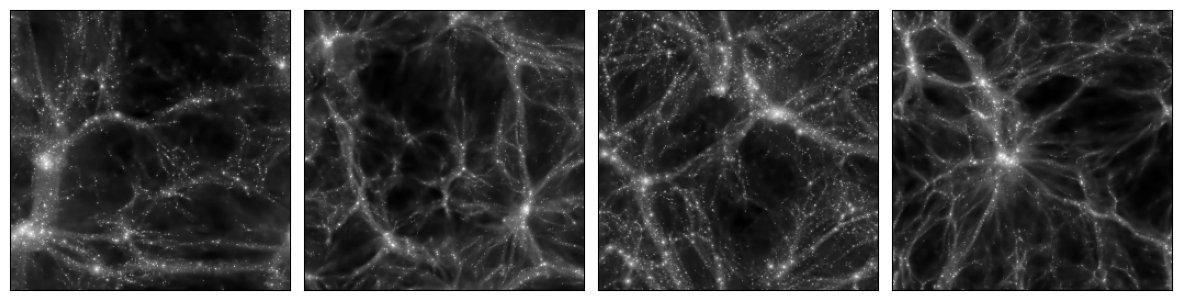

In [4]:
# Sampled images from dataset
imgs_real = torch.cat([diffusion.unnormalize(trainer.ds[i]) for i in range(0,4)])
sample_plot_image(imgs_real, num_images=4)

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

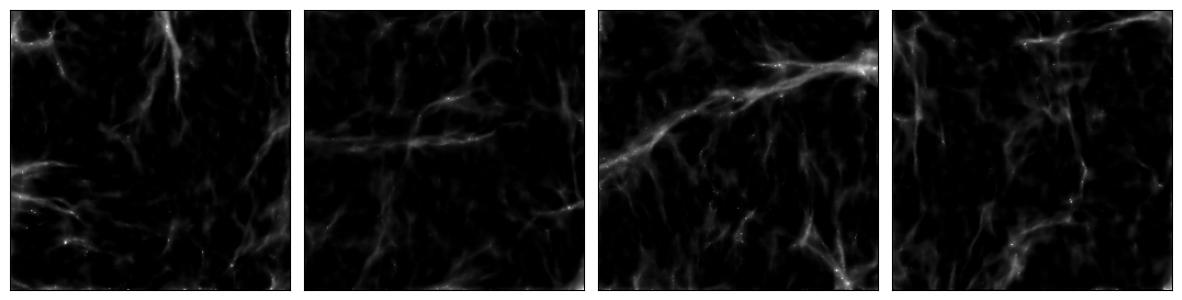

In [5]:
# Show some sample images from DDPM
diffusion.model.eval()
with torch.no_grad():
    sampled_images = diffusion.sample(batch_size = 4)
imgs_gen = sampled_images.cpu().detach().squeeze()
sample_plot_image(imgs_gen, num_images=4)